<a href="https://colab.research.google.com/github/marciliojrr/PDI/blob/main/PDI_Trabalho_pr%C3%A1tico_2_Marc%C3%ADlio_J%C3%BAnior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introdução ao Processamento Digital de Imagens  
---
Professor: Leonardo  
Módulo 2 do Trabalho Prático - Data de entrega: 24/11/2021  
Aluno: Marcílio Júnior - Matrícula: 11413589  

---
####Descrição do trabalho:  
Neste trabalho, a DCT-2D (direta e inversa) deve ser desenvolvida utilizando as equações estudadas em sala de aula, sem o uso de bibliotecas prontas para esse fim.
* 1. Dada uma imagem I em níveis de cinza, de dimensões RxC, desenvolva um programa para:  
     * 1.1 Exibir o módulo normalizado da DCT de I, sem o nível DC, e o valor (numérico) do nível DC.  
     * 1.2. Encontrar e exibir uma aproximação de I obtida preservando o coeficiente DC e os n coeficientes AC mais importantes de I, e zerando os demais. O parâmetro n é um inteiro no intervalo [0, RxC-1]. 
* 2. Desenvolva um programa para reforçar os graves, no domínio DCT, de um sinal s, em formato .wav, com N amostras. O reforço será obtido pela multiplicação do coeficiente de frequência (adimensional) k por um valor y dado por:
\begin{equation}
\mathrm{Y}=g \frac{1}{\sqrt{1+\left(\frac{k}{f c}\right)^{2 n}}}+1
\end{equation}  
Em que g controla o ganho (g = 0.5 é 50% de ganho máximo), fc é a frequência de corte (adimensional) e n é a ordem do filtro.

Observações:
1. O trabalho pode ser feito em grupo, com até cinco componentes. Um membro do grupo deve enviar o nome de todos os componentes em um e-mail com assunto “Grupo de PDI”. para leonardo@ci.ufpb.br.  
2. Para integralização das notas, o trabalho deve ser apresentado na data e horário marcados para cada grupo, juntamente com um relatório em formato PDF enviado previamente, contendo pelo menos as seguintes seções: introdução (contextualização e apresentação do tema, fundamentação teórica, objetivos), materiais e métodos (descrição das atividades desenvolvidas e das ferramentas e conhecimentos utilizados), resultados, discussão (problemas e dificuldades encontradas, comentários críticos sobre os resultados) e conclusão. O relatório e código-fonte devem ser enviados até o início da primeira aula de apresentação dos trabalhos.  
3. Cada componente do grupo deve estar familiarizado com o trabalho desenvolvido pelos 
demais componentes do seu grupo, e todos devem comparecer à apresentação dos 
trabalhos

#0. Importação de dependências e criação das funções
##0. Importing dependencies and creating roles

In [1]:
# Importando dependênias.
# Importing dependencies.
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi, sqrt, cos
from PIL import Image

## Funções DCT e IDCT
### DCT and IDCT functions
---
DCT de $x[n]:$
$$
X[k]=\left(\frac{2}{N}\right)^{1 / 2} c_{k} \sum_{n=0}^{N-1} x[n] \cos \left[2 \pi \frac{k}{2 N} n+\frac{k \pi}{2 N}\right], k=0,1, \ldots, N-1
$$

---
Transformada DCT inversa (IDCT) de $X[k]:$
$$
x[n]=\left(\frac{2}{N}\right)^{1 / 2} \sum_{k=0}^{N-1} c_{k} X[k] \cos \left[2 \pi \frac{k}{2 N} n+\frac{k \pi}{2 N}\right], n=0,1, \ldots, N-1
$$

---
Definição do termo $c_k$:
$$
c_{k}= \begin{cases}(1 / 2)^{1 / 2} & \text {, para } k=0 \\ 1 & \text {, para } k=1,2, \ldots N-1\end{cases}
$$


##0.1. Função DCT
0.1. DCT function

In [2]:
# Definição da função para cálculo da DCT.
# Definition of the function for calculating the DCT.
def dct1d(x):
    N = x.size
    X = np.zeros(N)

    for k in range(N):
        if k == 0:
            ck = sqrt(0.5)
        else:
            ck = 1
        accumulator = 0
        for n in range(N):
            accumulator += x[n] * cos((2.0 * pi * (k / (2.0 * N) * n)) + ((k * pi) / (2.0 * N)))

        X[k] = sqrt(2.0 / N) * ck * accumulator

    return X


##0.2. Função IDCT
0.2. IDCT function

In [3]:
# Definição da função para cálculo da IDCT.
# Definition of the function for calculating the IDCT.
def idct1d(X):
    N = X.size
    x = np.zeros(N)

    for n in range(N):
        accumulator = 0
        for k in range(N):
            if k == 0:
                ck = sqrt(0.5)
            else:
                ck = 1
            accumulator += ck * X[k] * cos((2.0 * pi * (k / (2.0 * N)) * n) + (k * pi) / (2.0 * N))
        
        x[n] = sqrt(2.0 / N) * accumulator

    return x


##0.1.3. Testando funções
0.3. Testing Functions

In [4]:
# Criando um array com valores aleatórios
# Creating an array with random values
x = np.random.random_sample(5)

X_DCT = dct1d(x)
X_IDCT = idct1d(X_DCT)

print(f'''{x}
{X_IDCT}''')

[0.59511521 0.28445764 0.72288494 0.32981137 0.2125013 ]
[0.59511521 0.28445764 0.72288494 0.32981137 0.2125013 ]


#1. Tratando imagem
###1. Treating image

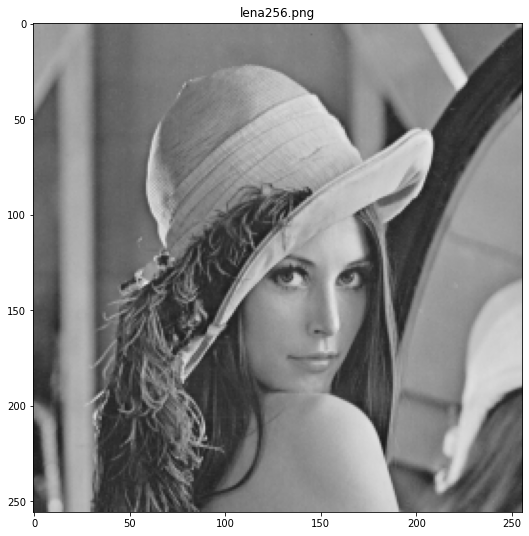

In [43]:
img = Image.open('lena256.png')
plt.figure(figsize=[90, 9])
plt.imshow(img, cmap='gray')
plt.title('lena256.png')
plt.show()

In [6]:
# Aplicando DCT 1D nas linhas da imagem.
img = np.asarray(img)
imgDCT = np.zeros(img.shape)

for i, line in enumerate(img):
    imgDCT[i] = dct1d(line)

# Fazendo a transposta da imagem. Linhas viram colunas.
imgDCT = imgDCT.T

# Aplicando DCT 1D nas colunas da imagem.
for i, line in enumerate(imgDCT):
    imgDCT[i] = dct1d(line)

# Retornando a imagem para a forma original.
imgDCT = imgDCT.T

 - Valor (aproximado) do nível DC: 31883.61



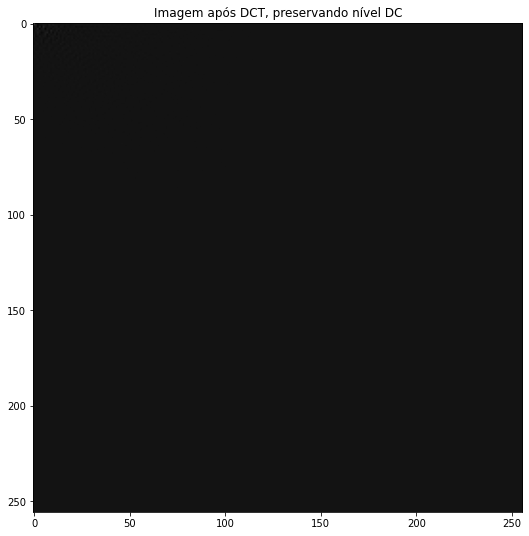

In [7]:
# Exibindo a imagem após aplicação da DCT.
plt.figure(figsize=[90, 9])
plt.imshow(imgDCT, cmap='gray')
plt.title("Imagem após DCT, preservando nível DC")

print(f' - Valor (aproximado) do nível DC: {imgDCT[0][0]:.2f}\n')

Text(0.5, 1.0, 'Imagem após DCT, removendo nível DC')

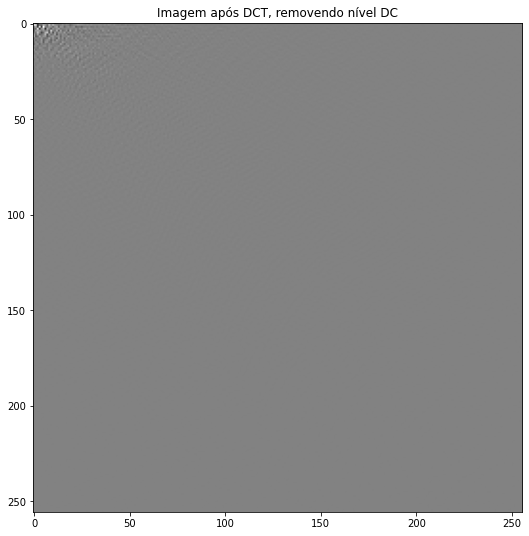

In [8]:
imgDCT[0][0] = 0
plt.figure(figsize=[90, 9])
plt.imshow(imgDCT, cmap='gray')
plt.title("Imagem após DCT, removendo nível DC")

Text(0.5, 1.0, 'Imagem após DCT normalizada, sem nível DC')

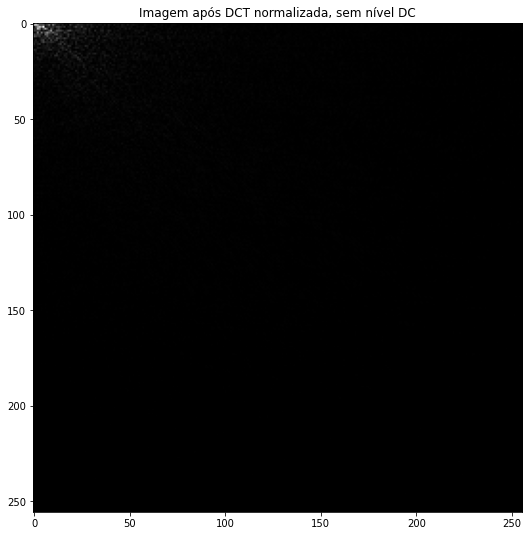

In [9]:
imgDCT_norm = imgDCT.copy()

for i in range(imgDCT_norm.shape[0]):
    for j in range(imgDCT_norm.shape[1]):
        imgDCT_norm[i][j] = abs(imgDCT_norm[i][j])

plt.figure(figsize=[90, 9])
plt.imshow(imgDCT_norm, cmap='gray')
plt.title("Imagem após DCT normalizada, sem nível DC")

In [38]:
imgFreq = []
freq = int(input('''Qual número de frequências desejadas?\n
>>>'''))

Qual número de frequências desejadas?

>>>10000


In [39]:
imgDCT_filtered = imgDCT.copy()
aux = imgDCT_filtered.copy() # não usado?
img_sort = list(np.ndenumerate(imgDCT_norm))

def sortKey(e):
    return e[1]

img_sort.sort(key=sortKey)
img_sort = img_sort[:: -1]

for i in range(freq):
    imgFreq.append(img_sort[i][0])

imgFreq.insert(0, (0, 0))

for i in range(imgDCT_filtered.shape[0]):
    for j in range(imgDCT_filtered.shape[1]):
        if (i, j) not in imgFreq:
            imgDCT_filtered[i][j] = 0

In [40]:
imgIDCT = np.zeros(img.shape)

for i, line in enumerate(imgDCT_filtered):
    imgIDCT[i] = idct1d(line)

imgIDCT = imgIDCT.T

for i, line in enumerate(imgIDCT):
    imgIDCT[i] = idct1d(line)

imgIDCT = imgIDCT.T


Text(0.5, 1.0, 'Imagem após IDCTa, 10000 amostra(s)')

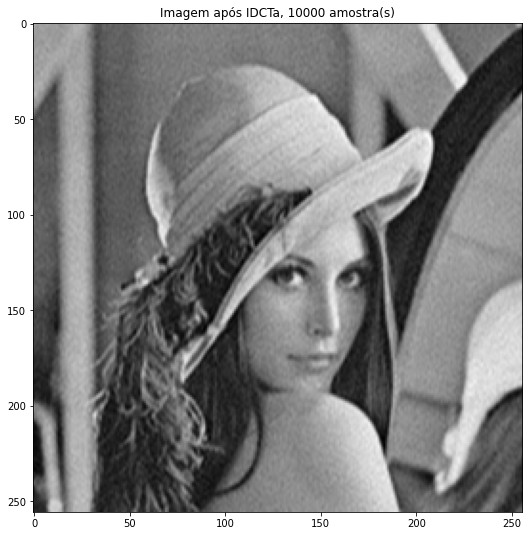

In [42]:
plt.figure(figsize=[90, 9])
plt.imshow(imgIDCT, cmap='gray')
plt.title(f'Imagem após IDCT, {freq} amostra(s)')

Text(0.5, 1.0, 'Imagem após IDCT, 10000 amostra(s)')

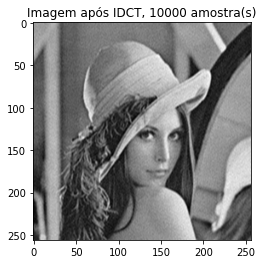

In [44]:
plt.imshow(imgIDCT, cmap='gray')
plt.title(f'Imagem após IDCT, {freq} amostra(s)')

Text(0.5, 1.0, 'Imagem original')

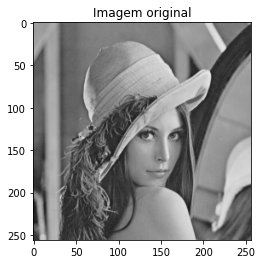

In [45]:
plt.imshow(img, cmap='gray')
plt.title(f'Imagem original')